1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


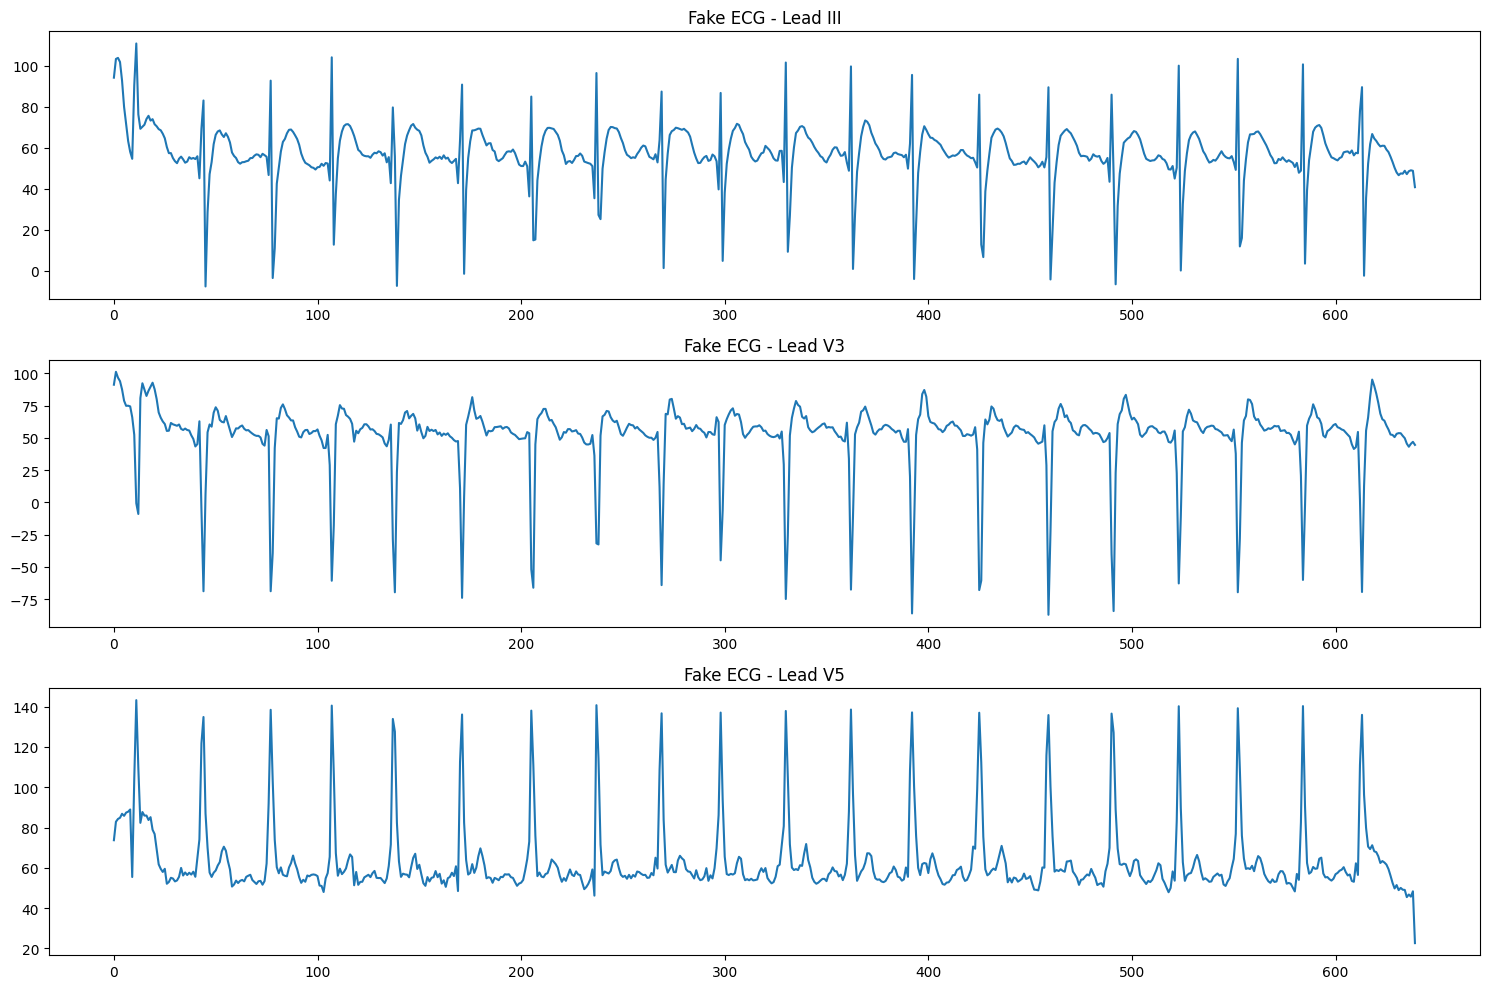

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from keras import Model
from keras.api.saving import load_model
from gan_preprocessing import load_data, reverse_ecg_normalization, reverse_crf_to_df, Model_path, scaler
from sklearn.preprocessing import MinMaxScaler

data = np.load("../normalized_ecg.npy", allow_pickle=True)
n_records = len(data)
subset_size = 10000
indices_all = np.arange(n_records)
indices = np.random.choice(indices_all, subset_size, replace=False)
subset_ecg_dataset = [data[i] for i in indices]
m_scaler = MinMaxScaler(feature_range=(-1, 1)
                        ).fit(np.vstack(subset_ecg_dataset))

# _, m_scaler, c_bin_minmax_scaler = load_data(segment_length=1)
# seconds_to_generate = 60
Leads = ['III', 'V3', 'V5']

model: Model = load_model(f"gan/generator.keras")
noise = np.random.normal(0, 1, (1, 100))
gen_ecgs = model.predict(noise,10)

# Concatenate the generated segments
gen_ecgs_full = np.concatenate(gen_ecgs, axis=0)
gen_ecgs_full = reverse_ecg_normalization(gen_ecgs_full, m_scaler)
# gen_crfs = [gen_crfs_g[0][0], gen_crfs_n[0][0], gen_crfs_n[0][1], gen_crfs_n[0]
#             [2], gen_crfs_s[0][0], gen_crfs_n[0][3], gen_crfs_n[0][4], gen_crfs_v[0][0]]
# gen_crfs_full = reverse_crf_to_df(gen_crfs, scaler, c_bin_minmax_scaler, col_names=[
#     'Gender', 'Age', 'Weight', 'Height', 'Smoker', 'SBP', 'DBP', 'Vascular Event'])
# print(gen_crfs_full)
plt.figure(0, figsize=(15, 10))
for lead_idx in range(gen_ecgs_full.shape[1]):
    plt.subplot(3, 1, lead_idx + 1)
    plt.plot(gen_ecgs_full[:, lead_idx], label=f'Lead {Leads[lead_idx]}')
    plt.title(f'Fake ECG - Lead {Leads[lead_idx]}')

plt.tight_layout()
plt.show()
